In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/instagram-jan-jun2025.csv")
df.describe()

,Post ID,Duration (sec),Views,Reach,Likes,Shares,Follows,Comments,Saves
count,6.200000e+01,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,1.807519e+16,23.919355,25943.580645,19214.983871,1696.677419,552.967742,7.306452,3.919355,118.338710
std,1.620900e+14,20.191135,88224.899436,66119.021812,6830.251028,2156.283734,27.493420,5.478119,572.748677
min,1.785064e+16,0.000000,776.000000,438.000000,16.000000,0.000000,0.000000,0.000000,0.000000
25%,1.799303e+16,9.250000,1708.000000,1266.750000,52.000000,2.000000,0.000000,1.000000,1.000000
50%,1.805700e+16,19.000000,3108.500000,2220.500000,76.500000,8.000000,1.000000,2.000000,4.000000
75%,1.807973e+16,41.750000,4832.000000,3685.750000,130.750000,24.500000,2.000000,4.750000,11.750000
max,1.849928e+16,81.000000,481422.000000,367649.000000,39234.000000,11497.000000,157.000000,34.000000,4000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Post ID          62 non-null     int64  
 1   Category         62 non-null     object 
 2   Duration (sec)   62 non-null     int64  
 3   Publish time     62 non-null     object 
 4   Post type        62 non-null     object 
 5   Date             62 non-null     object 
 6   Views            62 non-null     int64  
 7   Reach            62 non-null     int64  
 8   Likes            62 non-null     int64  
 9   Shares           62 non-null     int64  
 10  Follows          62 non-null     int64  
 11  Comments         62 non-null     int64  
 12  Saves            62 non-null     int64  
 13  Engagement       62 non-null     int64  
 14  Engagement Rate  62 non-null     float64
dtypes: float64(1), int64(10), object(4)
memory usage: 7.4+ KB


Simulated summary data based on the user's input (approximation)

Create boxplots to visualize distribution (good for spotting outliers)

In [10]:
# Clean these columns just in case they're still dirty somewhere
cols_to_clean = ['Views', 'Reach', 'Likes', 'Shares', 'Follows', 'Comments', 'Saves']

for col in cols_to_clean:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Forces strings to NaN

# Now calculate Engagement if you haven't already
df['Engagement'] = df['Likes'] + df['Shares'] + df['Comments'] + df['Saves']

# Engagement Rate (based on Views), avoid division by 0
df['Engagement Rate'] = df['Engagement'] / df['Views'].replace(0, np.nan)


In [11]:
df.head(50)

,Post ID,Category,Duration (sec),Publish time,Post type,Date,Views,Reach,Likes,Shares,Follows,Comments,Saves,Engagement,Engagement Rate
0,18367425319140082,Living Aboard,46,01/07/2025 06:30,IG reel,Lifetime,3093,2325,69,19,1,2,3,93,0.030068
1,18041834792057218,Review,0,01/08/2025 16:24,IG carousel,Lifetime,1648,925,95,2,0,3,2,102,0.061893
2,18095944333504221,Living Aboard,14,01/10/2025 07:15,IG reel,Lifetime,4836,3808,130,13,1,3,3,149,0.030811
3,17863712913244250,Living Aboard,9,01/12/2025 06:53,IG reel,Lifetime,238915,178702,9780,6838,15,3,382,17003,0.071168
4,18046410413184721,Relationships,20,01/20/2025 07:41,IG reel,Lifetime,2597,1749,52,2,0,0,6,60,0.023104
5,18045161159017724,Relationships,7,01/23/2025 05:55,IG reel,Lifetime,4315,2616,132,8,0,7,6,153,0.035458
6,18473823307029448,Relationships,10,02/05/2025 05:09,IG reel,Lifetime,2762,2071,77,7,0,1,3,88,0.031861
7,17929141019901471,Relationships,12,02/14/2025 08:49,IG reel,Lifetime,4545,3113,285,12,2,9,9,315,0.069307
8,17893034796174530,SelfGrowth,30,02/16/2025 06:56,IG reel,Lifetime,2081,1588,89,8,1,0,3,100,0.048054
9,17861149410280450,Review,48,02/16/2025 16:39,IG reel,Lifetime,3611,2504,67,26,1,1,12,106,0.029355


In [ ]:
# Keep only the relevant numeric columns
columns_to_keep = [
    'Duration (sec)', 'Views', 'Reach',
    'Likes', 'Shares', 'Follows',
    'Comments', 'Saves'
]

df_subset = df[columns_to_keep]
df_subset.head(50)

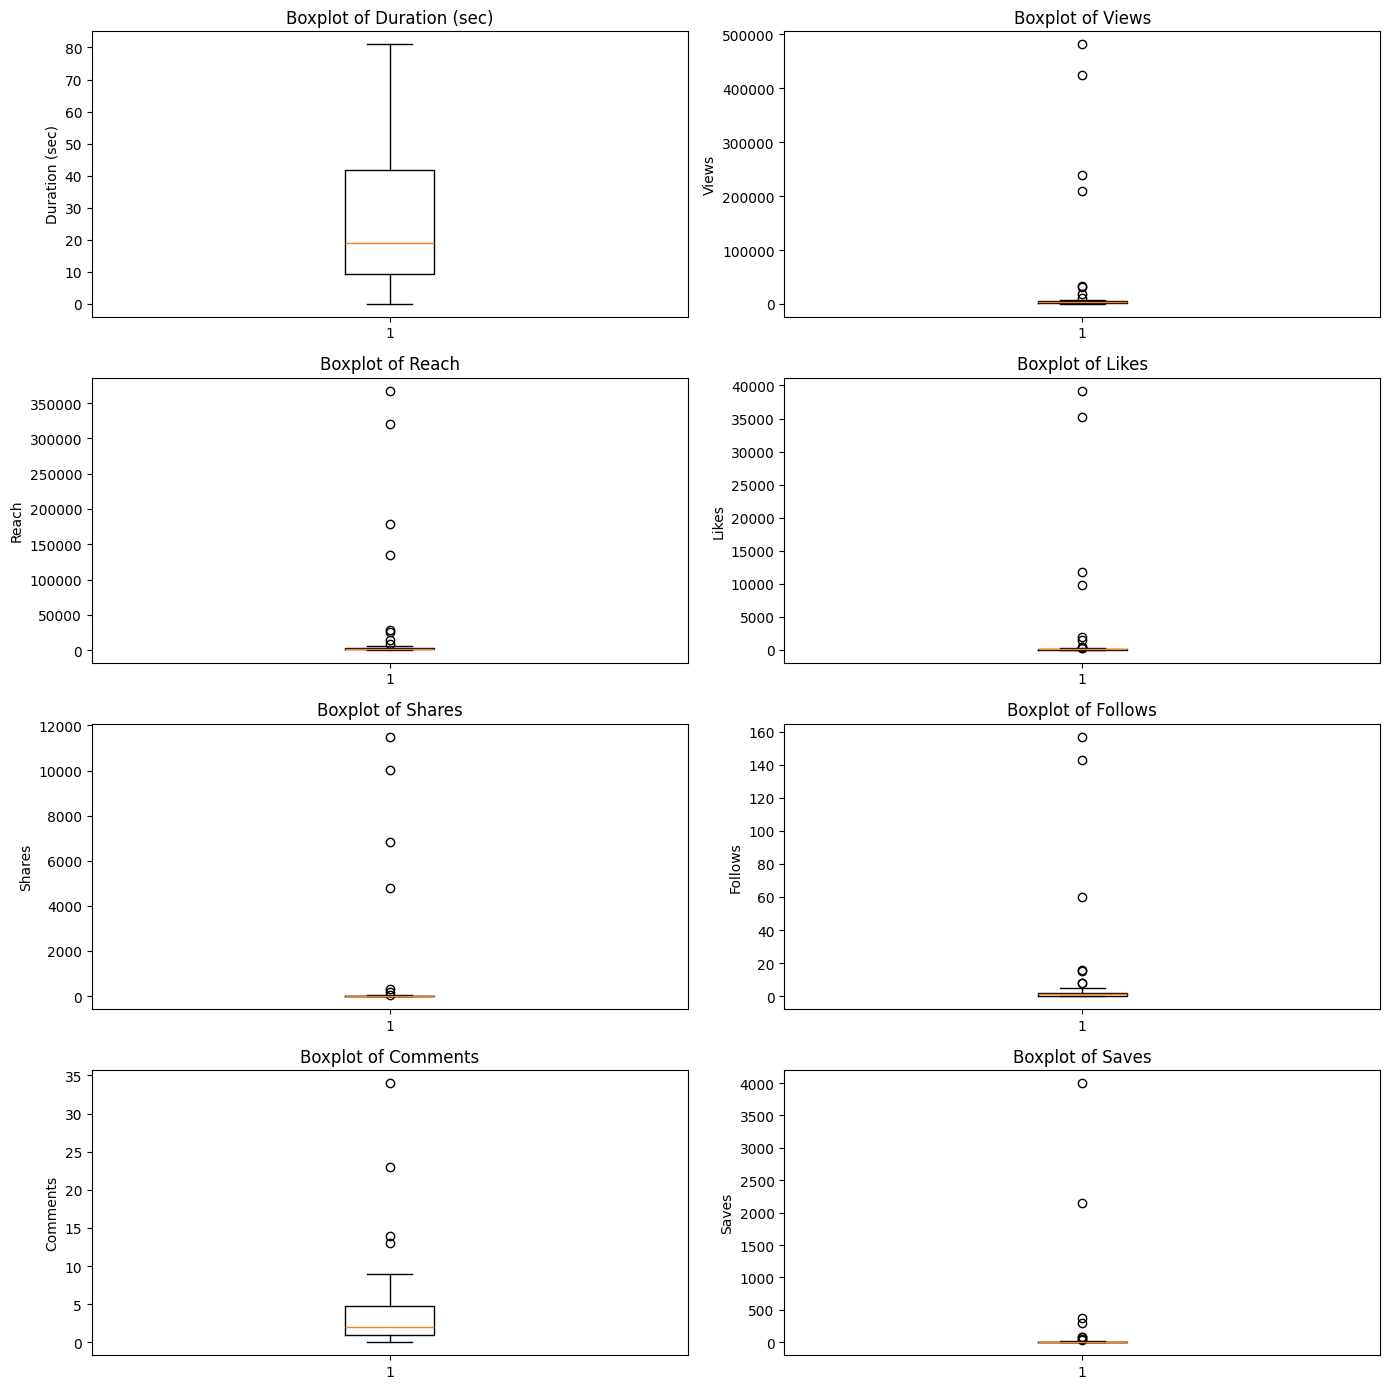

In [13]:
# Create boxplots to visualize distribution (good for spotting outliers)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 14))
axes = axes.flatten()

for idx, column in enumerate(df_subset.columns):
    axes[idx].boxplot(df_subset[column])
    axes[idx].set_title(f'Boxplot of {column}')
    axes[idx].set_ylabel(column)

plt.tight_layout()
plt.show()